Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details of
customers to predict customer response for special offer.
Create confusion matrix based on above data and find
a) Accuracy
b) Precision
c) Recall
d) F-1 score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


#Reading the data

In [ ]:

db = pd.read_csv('Heart (1).csv')


In [5]:
print(db.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


Checking null values

In [6]:
db.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

Removing null values

In [8]:
most_common = db['Thal'].mode()[0]
db['Thal'] = db['Thal'].fillna(most_common)

In [9]:
db['Ca'] = db['Ca'].fillna(db['Ca'].mean())

In [10]:
db.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

Drop unnecessary columns

In [12]:
db = db.drop(columns=["Unnamed:0"],errors = 'ignore')

In [16]:
db.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

Data Encoding

In [17]:
label_encoders = {}
categorical_cols = ['ChestPain','Thal','AHD']

In [22]:
for col in categorical_cols:
    le = LabelEncoder()
    db[col] = le.fit_transform(db[col])
    label_encoders[col] = le



In [28]:
x = db.drop(columns=['AHD'])
y = db['AHD']

In [30]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

Data Training

In [31]:
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = model.predict(x_test)

Creating Confusion Matrix

In [40]:
confMat = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [45]:
print("Confusion Matrix:")
print(confMat)
print(f"accuracy_score: {accuracy*100}")
print(f"precision_score: {precision*100}")
print(f"recall_score: {recall*100}")
print(f"f1_score: {f1*100}")

Confusion Matrix:
[[27  2]
 [ 4 28]]
accuracy_score: 90.1639344262295
precision_score: 93.33333333333333
recall_score: 87.5
f1_score: 90.32258064516128


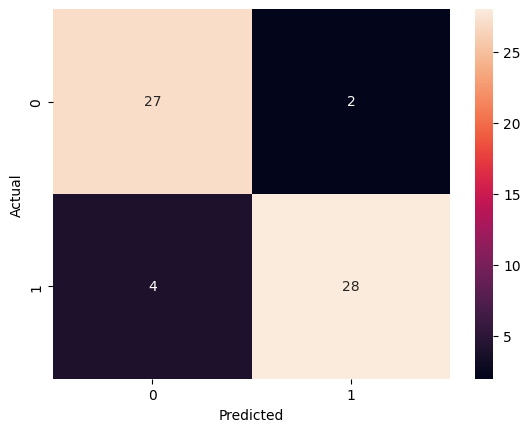

In [43]:
sns.heatmap(confMat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()